In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import math

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

/Users/ibhargava/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
dt = pd.read_csv('./Data/clean_vehicles.csv')

# Filtering POC

In [73]:
def filter_df(data, criteria) -> pd.DataFrame:
    res = data.loc[(data[list(criteria)] == pd.Series(criteria)).all(axis=1)]
    # rem.append(['url', 'region_url', 'VIN', 'image_url', 'description', 'posting_date', 'lat', 'long'])
    rem_0 = ['region',
     'state',
     'price',
     'year',
     'manufacturer',
     'model',
     'condition',
     'fuel',
     'odometer',
     'transmission',
     'drive',
     'size',
     'type']
    rem = [i for i in rem_0 if i not in list(criteria.keys())]
    return res[rem].reset_index(drop=True)

In [4]:
dt

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
0,7316814884,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,3GTP1VEC4EG551563,fwd,full-size,pickup,white,https://images.craigslist.org/00R0R_lwWjXSEWNa...,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2021-05-04T12:31:18-0500
1,7316814758,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,clean,other,1GCSCSE06AZ123805,fwd,full-size,pickup,blue,https://images.craigslist.org/00R0R_lwWjXSEWNa...,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2021-05-04T12:31:08-0500
2,7316814989,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,clean,other,3GCPWCED5LG130317,fwd,full-size,pickup,red,https://images.craigslist.org/01212_jjirIWa0y0...,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2021-05-04T12:31:25-0500
3,7316743432,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,clean,other,5TFRM5F17HX120972,fwd,full-size,pickup,red,https://images.craigslist.org/00x0x_1y9kIOzGCF...,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2021-05-04T10:41:31-0500
4,7316356412,https://auburn.craigslist.org/cto/d/auburn-uni...,auburn,https://auburn.craigslist.org,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,clean,automatic,missing,rwd,full-size,truck,black,https://images.craigslist.org/00404_l4loxHvdQe...,2013 F-150 XLT V6 4 Door. Good condition. Leve...,al,32.592000,-85.518900,2021-05-03T14:02:03-0500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383482,7301591192,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,sub-compact,sedan,white,https://images.craigslist.org/00o0o_iiraFnHg8q...,Carvana is the safer way to buy a car During t...,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
383483,7301591187,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,4 cylinders,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,sub-compact,sedan,red,https://images.craigslist.org/00x0x_15sbgnxCIS...,Carvana is the safer way to buy a car During t...,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
383484,7301591147,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,4 cylinders,diesel,4174.0,clean,other,1GYFZFR46LF088296,fwd,sub-compact,hatchback,white,https://images.craigslist.org/00L0L_farM7bxnxR...,Carvana is the safer way to buy a car During t...,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
383485,7301591140,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,sub-compact,sedan,silver,https://images.craigslist.org/00z0z_bKnIVGLkDT...,Carvana is the safer way to buy a car During t...,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600


In [5]:
import pandas as pd
from kmodes.kmodes import KModes
from matplotlib import pyplot as plt
import prince

In [6]:
dt.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'state', 'lat', 'long', 'posting_date'],
      dtype='object')

## Features we can use for search filtering
<ol>
<li> region/state
<li> price
<li> year
<li> manufacturer
<li> model
<li> condition
<li> fuel
<li> odometer
<li> transmission
<li> drive
<li> type
<li> size
</ol>

In [7]:
dt_cpy = dt[['region',
'state',
'price',
'year',
'manufacturer',
'model',
'condition',
'fuel',
'odometer',
'transmission',
'drive',
'size',
'type']].copy()

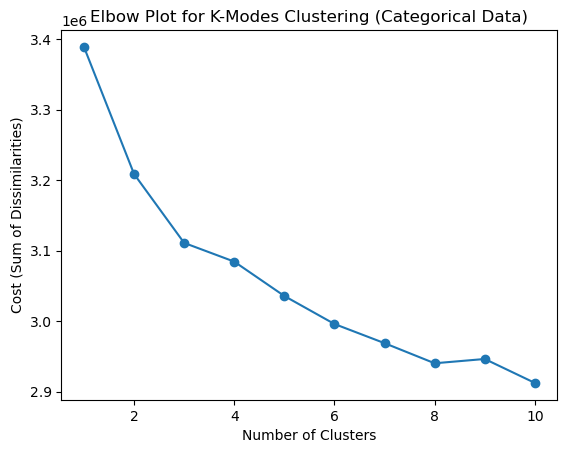

In [25]:
# Define a range of K values
k_range = range(1,11)

# Create an empty list to store cost values
cost_values = []

# Iterate through the K values
for k in k_range:
    # Initialize KModes with categorical columns
    kmodes = KModes(n_clusters=k, init='random', verbose=0)
    kmodes.fit(dt_cpy)
    # Store cost (sum of dissimilarities) for this k
    cost_values.append(kmodes.cost_)

# Plot the elbow plot
plt.plot(k_range, cost_values, marker="o")
plt.xlabel("Number of Clusters")
plt.ylabel("Cost (Sum of Dissimilarities)")
plt.title("Elbow Plot for K-Modes Clustering (Categorical Data)")
plt.show()

# Notes

1. The data from the FE will be in the form of json so it'll have the coulmn name and the value to filter on. Eg: [{'make':'Honda', 'model':'civic'}]

### Selecting K = 3

In [79]:
test_crit = {'manufacturer':'honda', 'model':'civic'}
res = filter_df(dt, criteria=test_crit)

In [80]:
res.shape

(2732, 11)

In [89]:
kmodes = KModes(n_clusters = 10, verbose = 0, init = 'Cao', n_jobs=8)
# clusters = kmodes.fit_predict(res)
km = kmodes.fit(res)
clusters = km.predict(res)

In [90]:
# silhouette score
from sklearn.metrics import silhouette_score

res_1 = pd.get_dummies(res)

sc = silhouette_score(res_1, km.labels_)
# plt.plot(range_n_clusters,silhouette_avg,'bx-')
# plt.xlabel('Values of K') 
# plt.ylabel('Silhouette score') 
# plt.title('Silhouette analysis For Optimal k')
# plt.show()

sc

-0.20400140356712437

In [42]:
clusters

array([0, 0, 1, ..., 1, 0, 0], dtype=uint16)

In [43]:
res['cluster'] = clusters

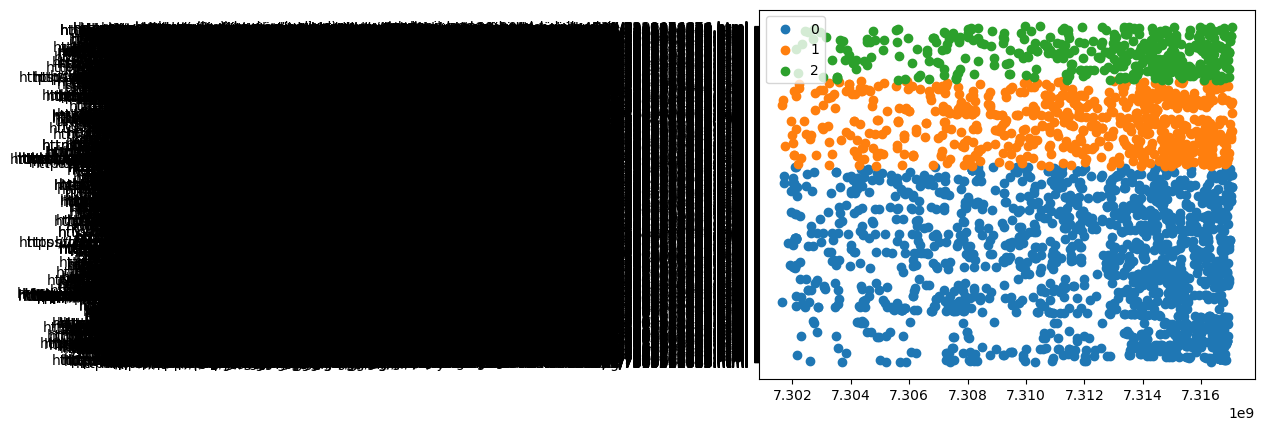

In [57]:
# import numpy as np
# from matplotlib import pyplot as plt

#Getting unique labels
u_labels = np.unique(clusters)
data = np.array(res)
#plotting the results:
for i in u_labels:
    plt.scatter(data[clusters == i][:,0], data[clusters == i][:,1], label = i)
plt.legend()
plt.show()


In [45]:
c0 = res[res['cluster'] == 0]
c1 = res[res['cluster'] == 1]
c2 = res[res['cluster'] == 2]

In [58]:
print(c0.shape)
print(c1.shape)
print(c2.shape)

(1592, 24)
(699, 24)
(441, 24)
